# EUR USD Pivot Strategy Backtest 
#
### by Wolfrank Guzman 
@guzmanwolfrank : Github 


In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # For plotly charts
%matplotlib inline
import quantstats as qs 
import datetime

plt.style.use('bmh')  # Example: Use a darker theme


In [2]:
# Define the strategy
def pivot_point_bounce_strategy(data):
    # Calculate daily pivot points
    data['PP'] = (data['High'] + data['Low'] + data['Close']) / 3
    data['R1'] = 2 * data['PP'] - data['Low']
    data['S1'] = 2 * data['PP'] - data['High']

    # Generate buy signals
    data['Signal'] = 0
    data.loc[(data['Close'] < data['PP']) & (data['Close'].shift(1) >= data['PP']), 'Signal'] = 1

    # Calculate hypothetical returns (assuming fixed position size)
    data['Returns'] = data['Close'].pct_change() * data['Signal'].shift(1)

    return data.round(4)

# Fetch ticker  data
ticker = "EURUSD=X"


data = yf.download(ticker, period="5y")

# Apply the strategy
data = pivot_point_bounce_strategy(data.copy())
df = data    

# Print key performance metrics
print("Hypothetical Strategy Performance:")
print("Total Return:", (data['Returns'] + 1).prod() - 1)
print("Max Drawdown:", (data['Returns'].cumsum() + 1).rolling(window=252).min() - 1)

[*********************100%***********************]  1 of 1 completed
Hypothetical Strategy Performance:
Total Return: 0.7385667793922039
Max Drawdown: Date
2019-01-24       NaN
2019-01-25       NaN
2019-01-28       NaN
2019-01-29       NaN
2019-01-30       NaN
               ...  
2024-01-18    0.4353
2024-01-19    0.4353
2024-01-22    0.4353
2024-01-23    0.4353
2024-01-24    0.4353
Name: Returns, Length: 1304, dtype: float64


In [3]:
# Add Columns for Balance, Profit, Unit Size, Delta, Change, Range, Shares 

# start_balance = 10,000
start_balance = 10000

# Profit = df['Returns']*1000 
df ['Profit'] = df['Returns'].round(2)*10000

# cum_profit = df['Profit'].cumsum()
cum_profit = df['Profit'].cumsum()

# Balance = cum_profit + start_balance
df['Balance'] = df['Profit'].cumsum() + 10000
# Range = df['high'] - df['low']
# Change = df['close'] - df['open']
# Shares = 1000 

display (df)

,Open,High,Low,Close,Adj Close,Volume,PP,R1,S1,Signal,Returns,Profit,Balance
Date,,,,,,,,,,,,,
2019-01-24,1.1387,1.1393,1.1313,1.1388,1.1388,0,1.1365,1.1417,1.1337,0,NaN,NaN,NaN
2019-01-25,1.1310,1.1412,1.1306,1.1313,1.1313,0,1.1344,1.1381,1.1276,1,-0.0000,-0.0,10000.0
2019-01-28,1.1413,1.1446,1.1391,1.1413,1.1413,0,1.1417,1.1442,1.1387,0,0.0088,100.0,10100.0
2019-01-29,1.1430,1.1451,1.1412,1.1430,1.1430,0,1.1431,1.1450,1.1411,0,0.0000,0.0,10100.0
2019-01-30,1.1435,1.1450,1.1409,1.1435,1.1435,0,1.1431,1.1454,1.1413,0,0.0000,0.0,10100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,1.0886,1.0908,1.0849,1.0886,1.0886,0,1.0881,1.0913,1.0854,0,0.0000,0.0,13500.0
2024-01-19,1.0879,1.0893,1.0868,1.0879,1.0879,0,1.0880,1.0892,1.0867,1,-0.0000,-0.0,13500.0
2024-01-22,1.0892,1.0910,1.0880,1.0892,1.0892,0,1.0894,1.0908,1.0878,0,0.0012,0.0,13500.0


In [4]:
# Filter rows where 'Returns' is not equal to zero
df_filtered = df[df['Profit'] != 0]


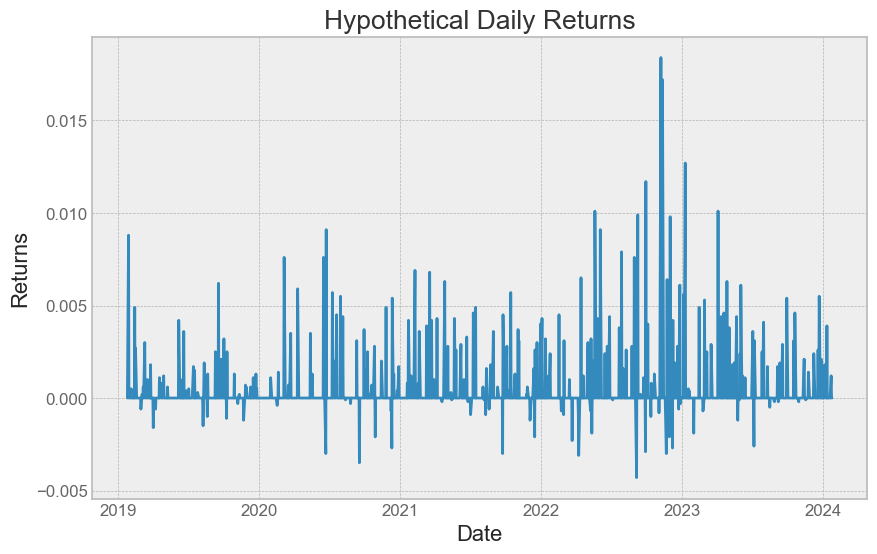

In [5]:

# Create the line chart
sns.lineplot(x="Date", y="Returns", data=df)

# Customize the plot
plt.title("Hypothetical Daily Returns")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid(True)

# Show the plot
plt.show()

[*********************100%***********************]  1 of 1 completed


                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2019-01-28   2019-01-28
End Period                 2024-01-24   2024-01-24
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       20.0%

Cumulative Return          -3.99%       73.86%
CAGR﹪                     -0.56%       7.95%

Sharpe                     -0.07        4.15
Prob. Sharpe Ratio         43.46%       100.0%
Smart Sharpe               -0.06        3.7
Sortino                    -0.1         20.11
Smart Sortino              -0.09        17.92
Sortino/√2                 -0.07        14.22
Smart Sortino/√2           -0.06        12.67
Omega                      9.1          9.1

Max Drawdown               -22.24%      -0.62%
Longest DD Days            1112         33
Volatility (ann.)          7.24%        2.59%
R^2                        0.15         0.15
Information Ratio          0.11         0.11
Calmar                

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2022-03-22,2022-04-08,2022-04-13,23,-0.618856,-0.309816
2,2022-09-05,2022-09-05,2022-09-07,3,-0.430000,-0.001849
3,2022-11-29,2022-11-30,2022-11-30,2,-0.409580,-0.210000
4,2020-12-08,2020-12-10,2020-12-10,3,-0.359743,-0.089986
5,2020-09-17,2020-09-17,2020-09-28,12,-0.350000,NaN


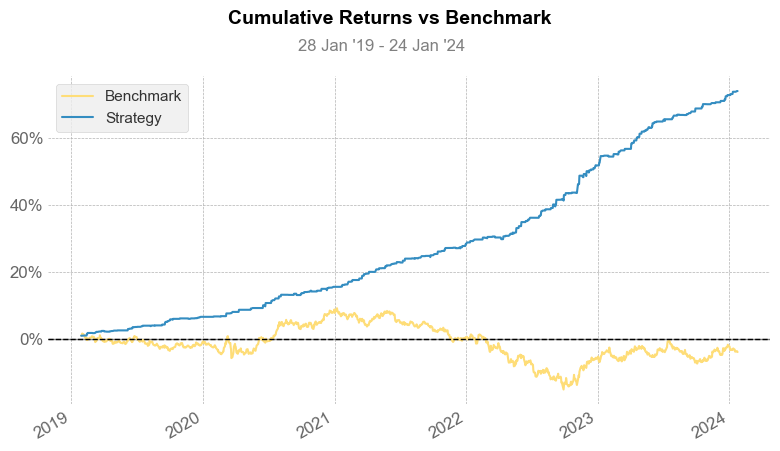

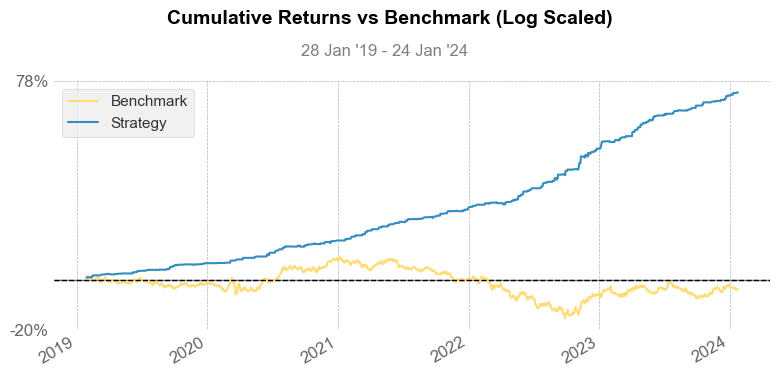

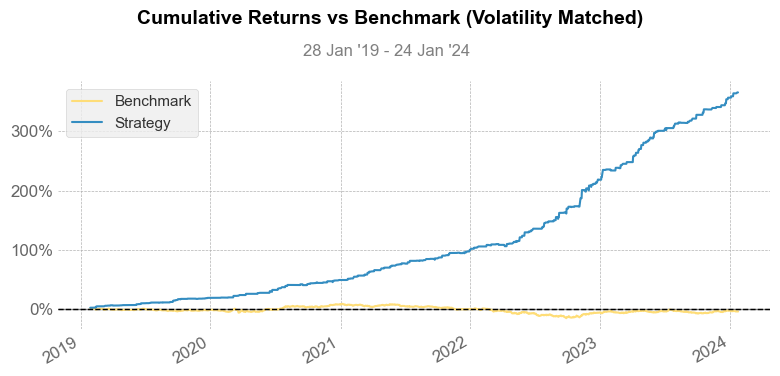

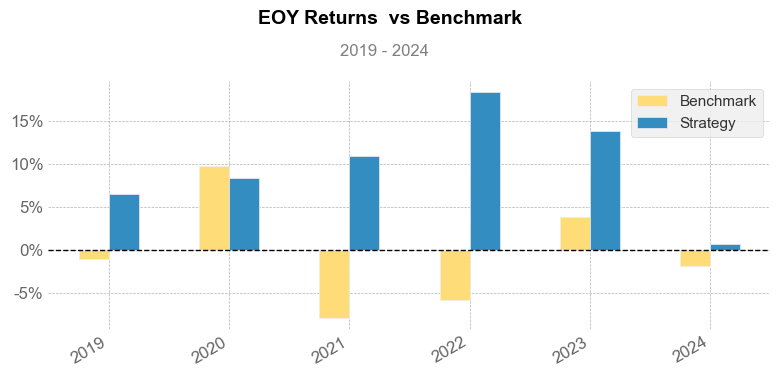

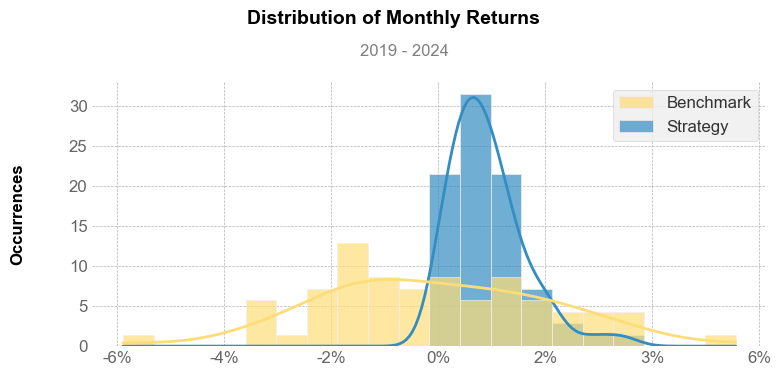

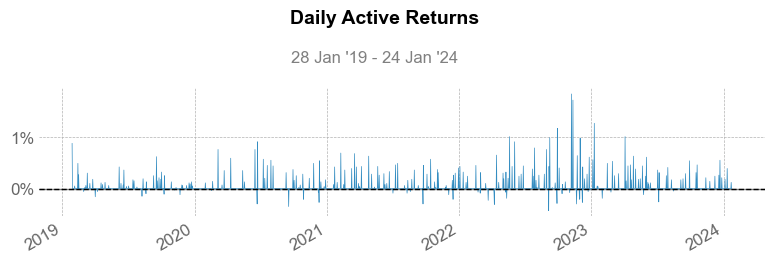

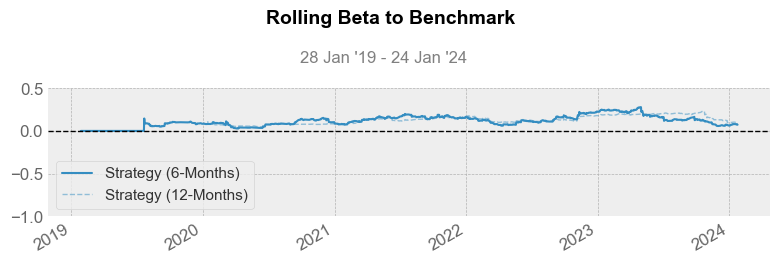

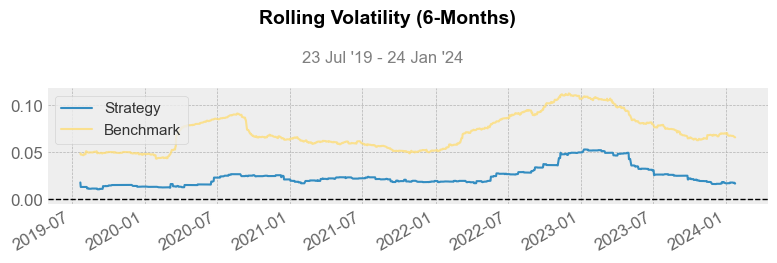

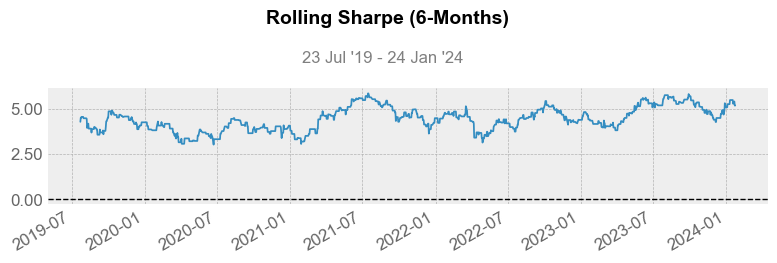

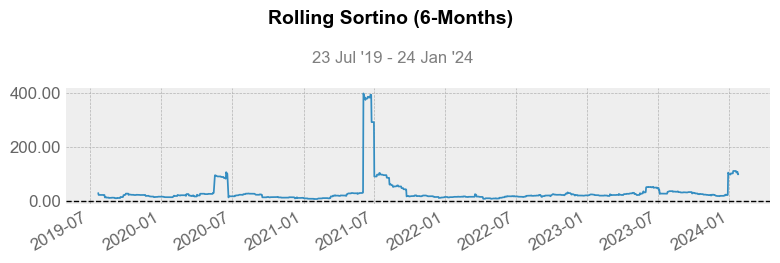

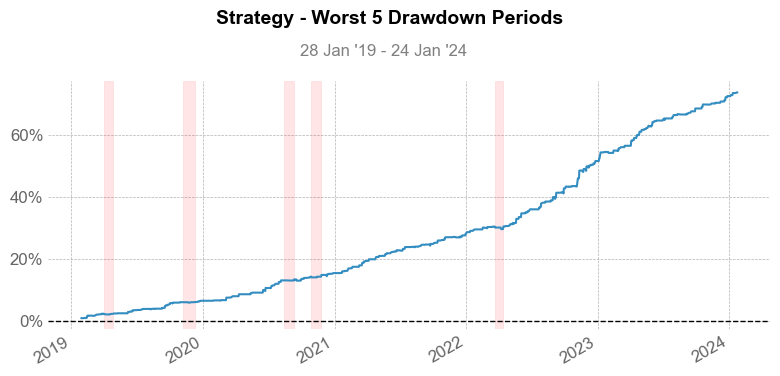

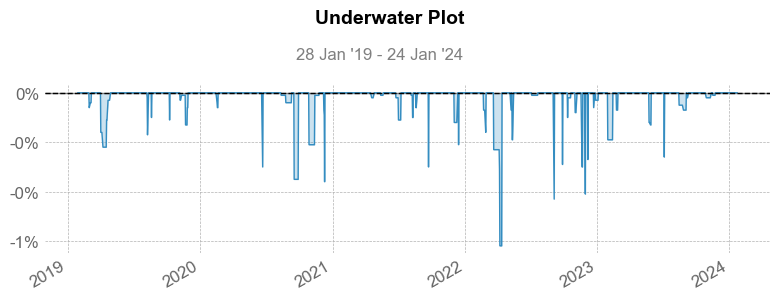

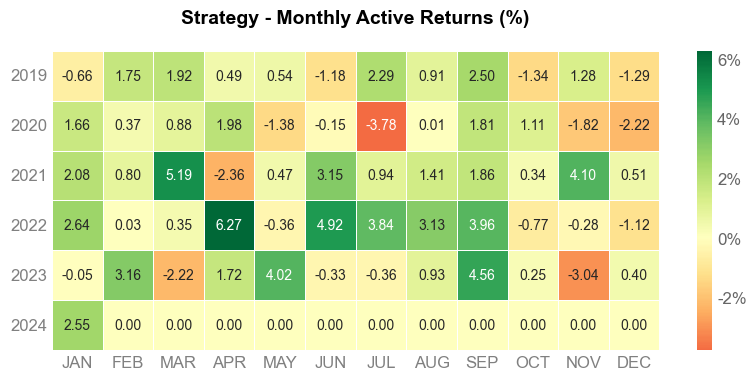

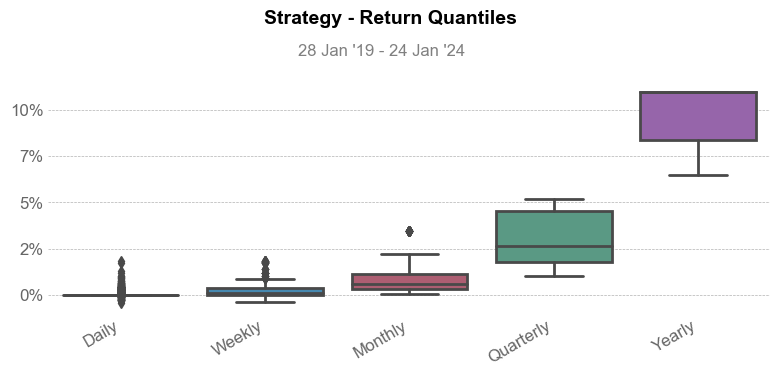

In [6]:
# Load returns, without having to convert to a series 
returns_series = df['Returns']

# Optional benchmark 
benchmark = qs.utils.download_returns("EURUSD=X")

# Full Returns and Benchmark Tearsheet 
qs.reports.full(returns_series, benchmark)

# Html Tearsheet
qs.reports.html(returns_series, benchmark=benchmark)